<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://raw.githubusercontent.com/Unidata/MetPy/master/metpy/plots/_static/unidata_150x150.png" alt="Unidata Logo" style="height: 98px;">
</div>

<h1>Basic Time Series Plotting</h1>
<h3>Unidata Python Workshop</h3>

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

<div style="float:right; width:250 px"><img src="http://matplotlib.org/_images/date_demo.png" alt="METAR" style="height: 300px;"></div>


## Overview:

* **Teaching:** 45 minutes
* **Exercises:** 30 minutes

### Questions
1. How can we read data with Pandas?
1. How are plots created in Python?
1. What features does Matplotlib have for improving our time series plots?
1. How can multiple y-axes be used in a single plot?

### Objectives
1. <a href="#loaddata">Reading in data</a>
1. <a href="#basictimeseries">Basic timeseries plotting</a>
1. <a href="#multiy">Multiple y-axes</a>

<a name="loaddata"></a>
## Reading in Data
To learn about time series analysis, we first need to find some data and get it into Python. In this case we're going to use a file that was downloaded from the [National Data Buoy Center](http://www.ndbc.noaa.gov). Specially we're going to look at [buoy 41056](http://www.ndbc.noaa.gov/station_page.php?station=41056) as hurricane Irma passed over it.

We'll use the [pandas](http://pandas.pydata.org) library for our data reading and modification as it provides a convenient way to subset and manipulate data. The data does not come in an easily usable format from the NDBC, so it's a good chance to get our hands dirty with real world data manipulation and time series plotting.

First, let's start out by reading the text file into a pandas dataframe. If we look at the file we can see it's in a "fixed-width" format - i.e. each column has the same number of characters always.

```
#YY  MM DD hh mm WDIR WSPD GST  WVHT   DPD   APD MWD   PRES  ATMP  WTMP  DEWP  VIS PTDY  TIDE
#yr  mo dy hr mn degT m/s  m/s     m   sec   sec degT   hPa  degC  degC  degC  nmi  hPa    ft
2017 09 21 19 00 140  8.0 11.0   1.1     6    MM  93 1009.0  28.5    MM    MM   MM -1.0    MM
2017 09 21 18 00 140  8.0 10.0   1.1     6    MM  90 1009.5  28.6    MM    MM   MM -1.3    MM
2017 09 21 17 00 150  8.0 11.0   1.2     7    MM  90 1010.1  28.6    MM    MM   MM -0.4    MM
2017 09 21 16 00 130  8.0 11.0   1.1     6    MM  89 1010.0  28.5    MM    MM   MM -0.4    MM
2017 09 21 15 00 140  9.0 11.0   1.1     6    MM 109 1010.8  28.8    MM    MM   MM +1.0    MM
```

The data columns are year, month, day, hour, minute, wind direction, wind speed, wind gust, wave height, dominant wave period, domininant wave direction, pressure, air temperature, water temperature, dewpoint, visibility, pressure tendency, and tide. As you can see, this buoy does not have all of those sensors, so some columns are filled with `MM`, representing missing data.

In [136]:
fname = '41056.txt'

In [137]:
import pandas as pd
df = pd.read_fwf(fname)

In [138]:
df

,#YY,MM,DD,hh,mm,WDIR WSPD GST,WVHT,DPD,APD,MWD PRES,ATMP,WTMP,DEWP,VIS,PTDY,TIDE
0,#yr,mo,dy,hr,mn,degT m/s m/s,m,sec,sec,degT hPa,degC,degC,degC,nmi,hPa,ft
1,2017,10,04,19,00,100 5.0 6.0,1.0,12,MM,15 1011.1,28.4,MM,MM,MM,-1.5,MM
2,2017,10,04,18,00,100 5.0 6.0,1.0,9,MM,9 1011.4,28.5,MM,MM,MM,-1.5,MM
3,2017,10,04,17,00,110 5.0 7.0,0.9,9,MM,10 1011.9,28.4,MM,MM,MM,-1.2,MM
4,2017,10,04,16,00,100 5.0 6.0,0.8,9,MM,8 1012.6,28.3,MM,MM,MM,-0.3,MM
5,2017,10,04,15,00,110 5.0 6.0,0.9,8,MM,39 1012.9,28.3,MM,MM,MM,+0.8,MM
6,2017,10,04,14,00,110 5.0 6.0,0.8,9,MM,38 1013.1,28.3,MM,MM,MM,+1.5,MM
7,2017,10,04,13,00,110 4.0 5.0,1.6,9,MM,44 1012.9,28.3,MM,MM,MM,+1.7,MM
8,2017,10,04,12,00,100 5.0 6.0,0.8,9,MM,65 1012.1,28.2,MM,MM,MM,+1.1,MM
9,2017,10,04,11,00,110 5.0 6.0,0.8,9,MM,64 1011.6,28.1,MM,MM,MM,+0.7,MM




Getting the data read was pretty easy, but we immediatly see that we've got some cleanup to do. The header row contains column names that are less than ideal. The first data row is actually a row of units as well. We also notice that the date is broken up between multiple columns. It would be nice to have that as one timestamp that is a Python datetime object. Finally, we need to replace `MM` with `NaN`. Luckily these tasks are not too onerous with pandas.

In [139]:
# Much better column names, remember to be descriptive and use tab completion when using these!
col_names = ['year', 'month', 'day', 'hour', 'minute', 'wind_direction', 'wind_speed',
             'wind_gust', 'wave_height', 'dominant_wave_period', 'average_wave_period',
             'dominant_wave_direction', 'pressure', 'temperature', 'water_temperature', 'dewpoint',
             'visibility', '3hr_pressure_tendency', 'water_level_above_mean']

In [140]:
df = pd.read_fwf(fname, skiprows=2, na_values='MM', names=col_names)

While we're manupulating the data frame, let's get rid of the columns with all missing data. We could use the `drop` method and manually name all of the columns, but that would require us to know which are all `NaN` and that sounds like manual labor - something that programmers hate. Pandas has the `dropna` method that allows us to drop rows or columns where any or all values are `NaN`. In this case, let's drop all columns with all `NaN` values.

In [141]:
df = df.dropna(axis='columns', how='all')

In [142]:
df.head()

,year,month,day,hour,minute,wind_direction,wind_speed,wind_gust,wave_height,dominant_wave_period,dominant_wave_direction,pressure,temperature,3hr_pressure_tendency,water_level_above_mean
0,2017,10,4,19,0,100,5.0,6.0,1.0,12.0,15.0,1011.1,28.4,-1.5,NaN
1,2017,10,4,18,0,100,5.0,6.0,1.0,9.0,9.0,1011.4,28.5,-1.5,NaN
2,2017,10,4,17,0,110,5.0,7.0,0.9,9.0,10.0,1011.9,28.4,-1.2,NaN
3,2017,10,4,16,0,100,5.0,6.0,0.8,9.0,8.0,1012.6,28.3,-0.3,NaN
4,2017,10,4,15,0,110,5.0,6.0,0.9,8.0,39.0,1012.9,28.3,0.8,NaN


Next, let's get the time stamps fixed up nicely. We need to combine the columns `year` `month` `day` `hour` and `minute` into a single column called `time`. We could cast all of these columns as strings, build the date time stamp string, then parse that, but that's a lot of steps! Looking in the documentation, we see that `parse_dates` can do all that for us. Here's an example of combining the `year` and `month` columns.

In [143]:
df['time'] = pd.to_datetime(df[['year', 'month', 'day']])

In [144]:
df.head()

,year,month,day,hour,minute,wind_direction,wind_speed,wind_gust,wave_height,dominant_wave_period,dominant_wave_direction,pressure,temperature,3hr_pressure_tendency,water_level_above_mean,time
0,2017,10,4,19,0,100,5.0,6.0,1.0,12.0,15.0,1011.1,28.4,-1.5,NaN,2017-10-04
1,2017,10,4,18,0,100,5.0,6.0,1.0,9.0,9.0,1011.4,28.5,-1.5,NaN,2017-10-04
2,2017,10,4,17,0,110,5.0,7.0,0.9,9.0,10.0,1011.9,28.4,-1.2,NaN,2017-10-04
3,2017,10,4,16,0,100,5.0,6.0,0.8,9.0,8.0,1012.6,28.3,-0.3,NaN,2017-10-04
4,2017,10,4,15,0,110,5.0,6.0,0.9,8.0,39.0,1012.9,28.3,0.8,NaN,2017-10-04


Our table now includes a 'time' column of timestamps. But the timestamps only include the date, and we have observations every hour - let's read the data in again, this time using all of the time stamp columns.

In [145]:
df['time'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])

df.head()

,year,month,day,hour,minute,wind_direction,wind_speed,wind_gust,wave_height,dominant_wave_period,dominant_wave_direction,pressure,temperature,3hr_pressure_tendency,water_level_above_mean,time
0,2017,10,4,19,0,100,5.0,6.0,1.0,12.0,15.0,1011.1,28.4,-1.5,NaN,2017-10-04 19:00:00
1,2017,10,4,18,0,100,5.0,6.0,1.0,9.0,9.0,1011.4,28.5,-1.5,NaN,2017-10-04 18:00:00
2,2017,10,4,17,0,110,5.0,7.0,0.9,9.0,10.0,1011.9,28.4,-1.2,NaN,2017-10-04 17:00:00
3,2017,10,4,16,0,100,5.0,6.0,0.8,9.0,8.0,1012.6,28.3,-0.3,NaN,2017-10-04 16:00:00
4,2017,10,4,15,0,110,5.0,6.0,0.9,8.0,39.0,1012.9,28.3,0.8,NaN,2017-10-04 15:00:00


<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>Now that we have timestamps, use the <code>drop</code> method to remove the now unused columns for year,
          month, day, hour, and minute (<b>HINT</b>: Look at the <code>axis</code> keyword
          argument in the documentation).</li>
    <li><b>BONUS:</b> Add a column, 'duration', which contains the time in seconds between subsequent observations (<b>HINT:</b> the statement <code>df[COLUMN_NAME].shift(OFFSET)</code> returns the values of COLUMN_NAME shifted by OFFSET). </li>
    </ul>
</div>

In [146]:
# Your code goes here


<div class="alert alert-info">
    <b>TIP</b>:
    Many of the pandas functions have the <code>inplace</code> keyword argument. This allows us to modify the dataframe without continually needing to reassign it. <code>df = df.command(...)</code> becomes <code>df.command(..., inplace=True)</code>.
</div>

<button data-toggle="collapse" data-target="#sol1" class='btn btn-primary'>Solution</button>

<div id="sol1" class="collapse">
<code><pre>

# Using inplace means the return is None and the dataframe is simply modified.
df.drop(['year', 'month', 'day', 'hour', 'minute'], axis='columns', inplace=True)

# BONUS: add a column for intervals between observations
df['duration'] = df['time'] - df['time'].shift(-1)

df.head()
</pre></code>
</div>

Finally, we need to trim down the data. The file contains 45 days worth of observations. We don't want to trim it too tightly and miss interesting things surrounding the hurricane's landfall, but having all 45 days is a bit overkill. Let's trim the data to dates between (and including) 9/06-9/08.

In [147]:
from datetime import datetime
idx = (df.time >= datetime(2017, 9, 6)) & (df.time <= datetime(2017, 9, 8))
df = df[idx]
df.head()

,year,month,day,hour,minute,wind_direction,wind_speed,wind_gust,wave_height,dominant_wave_period,dominant_wave_direction,pressure,temperature,3hr_pressure_tendency,water_level_above_mean,time
2114,2017,9,8,0,0,120,7.0,9.0,1.1,8.0,82.0,1012.0,29.2,1.3,NaN,2017-09-08 00:00:00
2115,2017,9,7,23,50,130,7.0,9.0,NaN,NaN,NaN,1012.0,29.2,NaN,NaN,2017-09-07 23:50:00
2116,2017,9,7,23,40,130,7.0,9.0,NaN,NaN,NaN,1011.9,29.2,NaN,NaN,2017-09-07 23:40:00
2117,2017,9,7,23,30,130,7.0,9.0,NaN,NaN,NaN,1011.7,29.1,NaN,NaN,2017-09-07 23:30:00
2118,2017,9,7,23,20,120,8.0,10.0,NaN,NaN,NaN,1011.4,29.2,NaN,NaN,2017-09-07 23:20:00


We're almost ready, but now the index column is not that meaningful. It starts at row 2114, which is fine with our initial file, but let's re-zero the index so we have a nice clean data frame to start with.

In [148]:
df.reset_index(drop=True, inplace=True)
df.head()

,year,month,day,hour,minute,wind_direction,wind_speed,wind_gust,wave_height,dominant_wave_period,dominant_wave_direction,pressure,temperature,3hr_pressure_tendency,water_level_above_mean,time
0,2017,9,8,0,0,120,7.0,9.0,1.1,8.0,82.0,1012.0,29.2,1.3,NaN,2017-09-08 00:00:00
1,2017,9,7,23,50,130,7.0,9.0,NaN,NaN,NaN,1012.0,29.2,NaN,NaN,2017-09-07 23:50:00
2,2017,9,7,23,40,130,7.0,9.0,NaN,NaN,NaN,1011.9,29.2,NaN,NaN,2017-09-07 23:40:00
3,2017,9,7,23,30,130,7.0,9.0,NaN,NaN,NaN,1011.7,29.1,NaN,NaN,2017-09-07 23:30:00
4,2017,9,7,23,20,120,8.0,10.0,NaN,NaN,NaN,1011.4,29.2,NaN,NaN,2017-09-07 23:20:00


<a href="#top">Top</a>
<hr style="height:2px;">

<a name="basictimeseries"></a>
## Basic Timeseries Plotting

Matplotlib is a python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. We're going to learn the basics of creating timeseries plots with matplotlib by plotting buoy wind, gust, temperature, and pressure data.

In [163]:
# Convention for import of the pyplot interface
import matplotlib.pyplot as plt

# Set-up to have matplotlib use its support for notebook inline plots
%matplotlib inline

# Register pandas converters with matplotlib
from pandas import plotting
plotting.register_matplotlib_converters()

We'll start by plotting the windspeeds during and surrounding Hurricane Irma.

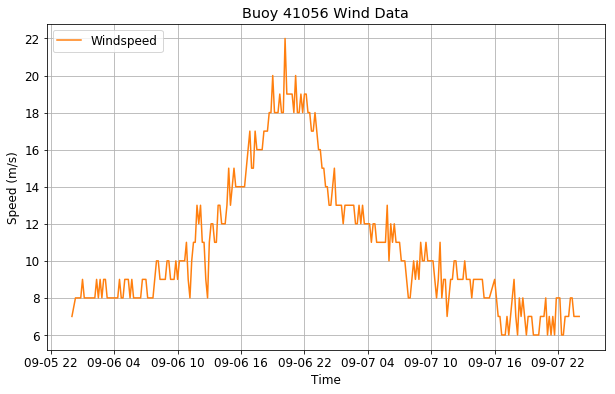

In [164]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(df.time, df.wind_speed, color='tab:orange', label='Windspeed')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Speed (m/s)')
ax.set_title('Buoy 41056 Wind Data')
ax.grid(True)
ax.legend(loc='upper left');

Our x axis labels look a little crowded - let's try only labeling each day in our time series.

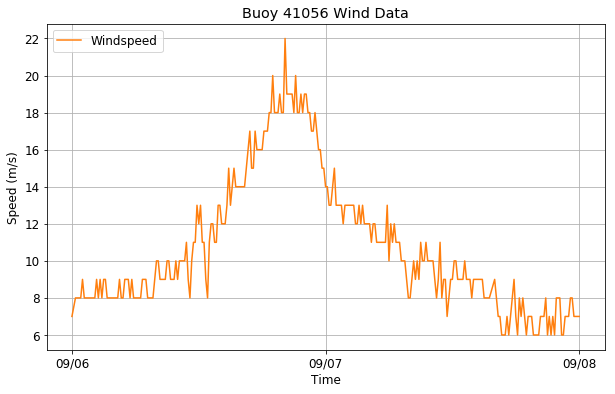

In [165]:
# Helpers to format and locate ticks for dates
from matplotlib.dates import DateFormatter, DayLocator

# Set the x-axis to do major ticks on the days and label them like '07/20'
ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))

fig

Now we can add wind gust speeds to the same plot as a dashed yellow line.

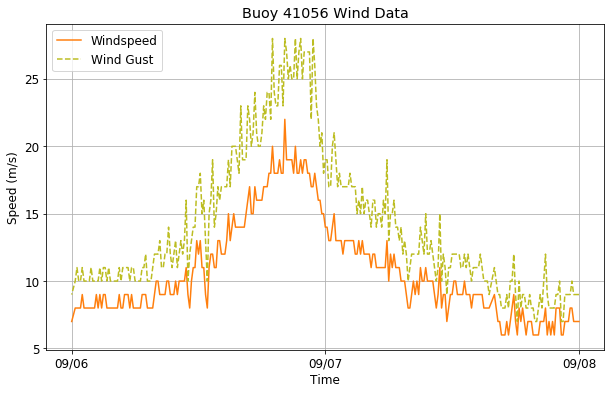

In [166]:
# Use linestyle keyword to style our plot
ax.plot(df.time, df.wind_gust, color='tab:olive', linestyle='--',
        label='Wind Gust')
# Redisplay the legend to show our new wind gust line
ax.legend(loc='upper left')

fig


<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
    <li>Create your own figure and axes (<code>myfig, myax = plt.subplots(figsize=(10, 6))</code>) which plots temperature.</li>
    <li>Change the x-axis major tick labels to read 'Sep DD' where DD is the day number. Look at the
        <a href="https://docs.python.org/3.6/library/datetime.html#strftime-and-strptime-behavior">
            table of formatters</a> for help.
    <li>Make sure you include a legend and labels!</li>
    <li><b>BONUS:</b> try changing the <code>linestyle</code>, e.g., a blue dashed line.</li>
    </ul>
</div>

In [167]:
# Your code goes here


<div class="alert alert-info">
    <b>Tip</b>:
     If your figure goes sideways as you try multiple things, try running the notebook up to this point again
     by using the Cell -> Run All Above option in the menu bar.
</div>

<button data-toggle="collapse" data-target="#sol2" class='btn btn-primary'>View Solution</button>
<div id="sol2" class="collapse">
<code><pre>
myfig, myax = plt.subplots(figsize=(10, 6))

# Plot temperature
myax.plot(df.time, df.temperature, color='tab:blue', linestyle='-.', label='Temperature')

myax.set_xlabel('Time')
myax.set_ylabel('Temperature (degC)')
myax.set_title('Buoy 41056 Data')
myax.grid(True)

# format x axis labels
myax.xaxis.set_major_locator(DayLocator())
myax.xaxis.set_major_formatter(DateFormatter('%b %d'))

myax.legend(loc='upper left');
fig
</pre></code>
</div>

<a href="#top">Top</a>
<hr style="height:2px;">

<a name="multiy"></a>
## Multiple y-axes
What if we wanted to plot another variable in vastly different units on our plot? <br/>
Let's return to our wind data plot and add pressure.

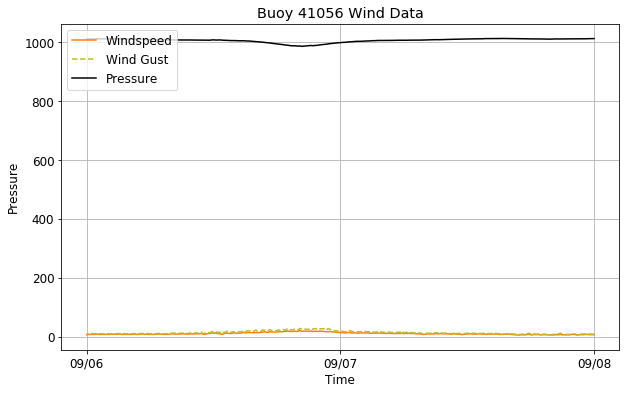

In [168]:
# plot pressure data on same figure
ax.plot(df.time, df.pressure, color='black', label='Pressure')
ax.set_ylabel('Pressure')

ax.legend(loc='upper left')

fig

That is less than ideal. We can't see detail in the data profiles! We can create a twin of the x-axis and have a secondary y-axis on the right side of the plot. We'll create a totally new figure here.

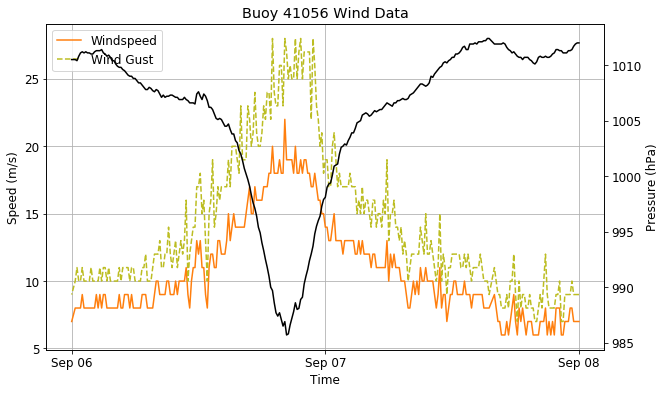

In [169]:
fig, ax = plt.subplots(figsize=(10, 6))
axb = ax.twinx()

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Speed (m/s)')
ax.set_title('Buoy 41056 Wind Data')
ax.grid(True)

# Plotting on the first y-axis
ax.plot(df.time, df.wind_speed, color='tab:orange', label='Windspeed')
ax.plot(df.time, df.wind_gust, color='tab:olive', linestyle='--', label='Wind Gust')
ax.legend(loc='upper left');

# Plotting on the second y-axis
axb.set_ylabel('Pressure (hPa)')
axb.plot(df.time, df.pressure, color='black', label='pressure')

ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))


We're closer, but the data are plotting over the legend and not included in the legend. That's because the legend is associated with our primary y-axis. We need to append that data from the second y-axis.

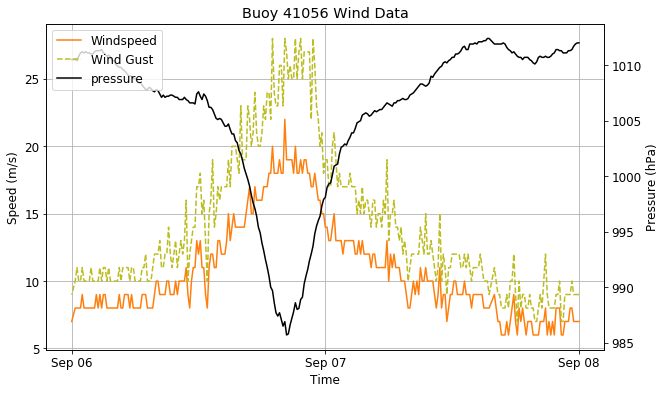

In [170]:
fig, ax = plt.subplots(figsize=(10, 6))
axb = ax.twinx()

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Speed (m/s)')
ax.set_title('Buoy 41056 Wind Data')
ax.grid(True)

# Plotting on the first y-axis
ax.plot(df.time, df.wind_speed, color='tab:orange', label='Windspeed')
ax.plot(df.time, df.wind_gust, color='tab:olive', linestyle='--', label='Wind Gust')

# Plotting on the second y-axis
axb.set_ylabel('Pressure (hPa)')
axb.plot(df.time, df.pressure, color='black', label='pressure')

ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

# Handling of getting lines and labels from all axes for a single legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = axb.get_legend_handles_labels()
axb.legend(lines + lines2, labels + labels2, loc='upper left');

<div class="alert alert-success">
    <b>EXERCISE</b>:
    Create your own plot that has the following elements:
     <ul>
    <li>A blue line representing the wave height measurements.</li>
    <li>A green line representing wind speed on a secondary y-axis</li>
    <li>Proper labels/title.</li>
    <li>**Bonus**: Make the wave height data plot as points only with no line. Look at the documentation for the linestyle and marker arguments.</li>
    </ul>
</div>

In [171]:
# Your code goes here


<button data-toggle="collapse" data-target="#sol3" class='btn btn-primary'>View Solution</button>
<div id="sol3" class="collapse">
<code><pre>
myfig, myax = plt.subplots(figsize=(10, 6))
myaxb = myax.twinx()

# Same as above
myax.set_xlabel('Time')
myax.set_ylabel('Wave Height (m)')
myax.set_title('Buoy 41056 Data')
myax.grid(True)

# Plotting on the first y-axis
myax.plot(df.time, df.wave_height, color='tab:blue', label='Waveheight (m)',
        linestyle='None', marker='o')

# Plotting on the second y-axis
myaxb.set_ylabel('Windspeed (m/s)')
myaxb.plot(df.time, df.wind_speed, color='tab:green', label='Windspeed (m/s)')

myax.xaxis.set_major_locator(DayLocator())
myax.xaxis.set_major_formatter(DateFormatter('%b %d'))

# Handling of getting lines and labels from all axes for a single legend
mylines, labels = myax.get_legend_handles_labels()
mylines2, labels2 = myaxb.get_legend_handles_labels()
myax.legend(lines + lines2, labels + labels2, loc='upper left');
</pre></code>
</div>

<a href="#top">Top</a>
<hr style="height:2px;">